# DBSCSN Outlier Detection for Eps

Here we demo outlier deetction using DBSCAN to identify outliers.

DBSCAN is easy to use; it however, is senitive to selection of eps. Here we demo two ways to determine eps: 

1.  pair distance scheme
2.  neighbor distance scheme

As examples, we test several scenarios, with seasonality and trend. With improperly eps, the DBSCAN will impact the outlier detection.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def rolling_avg(data, depth=5):
    '''
    assume input data is a numpy.array
    '''
    ret = np.cumsum(data, dtype=float)
    div = np.array(range(1, depth))
    ret[depth:] = ret[depth:] - ret[:-depth]
    return list(ret[:depth-1] / div) + list(ret[depth-1:] / depth)

def visualize(data, pred):
    print (pred)
    plt.figure(figsize=(10, 1))
    plt.plot(data, '-o')
    plt.scatter(range(len(data)), pred, color="red")
    plt.plot([0]*len(data), '--', color="black")
    plt.show()
    
def standardize(data):
    reshaped_data = np.array(data).reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit(reshaped_data)
    return scaler.transform(reshaped_data)

In [89]:
data1 = list(range(30))
data2 = [1, 2, 3, 4, 5] * 6
data3 = [2.6] * 30
data3[12] = 28
data4 = [2,2,1,3,2,4,0,4,6,4,6,5,4,5,3,2,6,6,7,6,6,2,7,5,6,6,4,3,2,8,2,3,5,2,8]

# test data from stackoverflow:
data5 = [7342.1301373073857, 6881.7109460930769, 6531.1657905495022, 6356.2255554679778, 6209.8382535595829, 6094.9052166741121, 5980.0191582610196, 5880.1869867848218, 5779.8957906367368, 5691.1879324562778, 5617.5153566271356, 5532.2613232619951, 5467.352265375117, 5395.4493783888756, 5345.3459908298091, 5290.6769823693812, 5243.5271656371888, 5207.2501206569532, 5164.9617535255456]

# airline-passenger data: https://github.com/jbrownlee/Datasets/blob/master/airline-passengers.csv
data6 = pd.read_csv("airline_passengers.csv")["Passengers"].tolist()


We can see the selection of eps in DBSCAN seriously impacts the clustering result by the below trend data:

## A. Eps=0.1

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


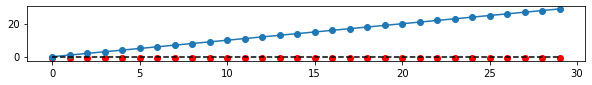

In [28]:
normed_data = standardize(data1)
model = DBSCAN(eps=0.1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data1, pred)

## B. Eps=1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


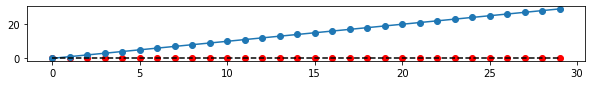

In [31]:
model = DBSCAN(eps=1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data1, pred)

# 1. Use Pair Distance and Elbow to Determine Eps

In [67]:
from scipy.spatial import distance_matrix
from kneed import KneeLocator

def estimate_eps_pairdistance(X, metric="euclidean"):
    '''
    https://stackoverflow.com/questions/51762514/find-the-elbow-point-on-an-optimization-curve-with-python
    https://kneed.readthedocs.io/en/stable/parameters.html
    '''
    
    pair_distance = distance_matrix(np.array(X).reshape(-1, 1), np.array(X).reshape(-1, 1))
    pair_distance = sorted([x for x in pair_distance.reshape((pair_distance.size, ))])
    
    num_pair_dist = len(pair_distance)
    
    print("size of pair distance:", num_pair_dist)
    plt.figure(figsize=(8,2))
    plt.plot(range(num_pair_dist), pair_distance)
    plt.show()
    
    kn = KneeLocator(range(num_pair_dist), pair_distance, curve="convex", interp_method="polynomial", polynomial_degree=4, direction="increasing")
    kn.plot_knee()
    print(kn.elbow)
    return pair_distance[kn.elbow-1]


size of pair distance: 900


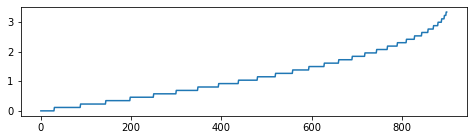

623
eps: 1.5019453458846204
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


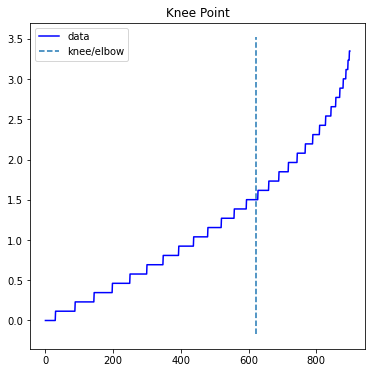

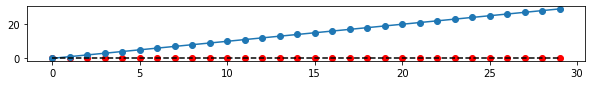

In [80]:
normed_data = standardize(data1)
eps = estimate_eps_pairdistance(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data1, pred)

size of pair distance: 900


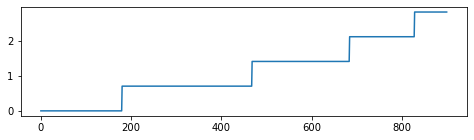

630
eps: 1.414213562373095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


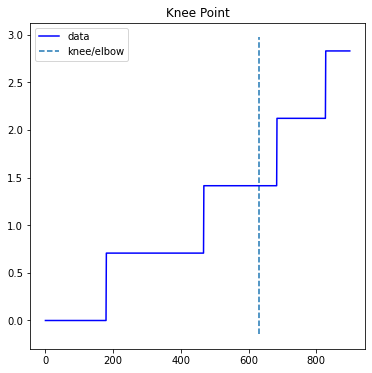

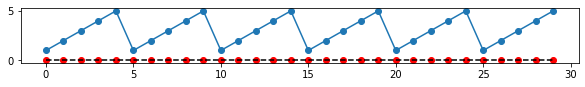

In [69]:
normed_data = standardize(data2)
eps = estimate_eps_pairdistance(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data2, pred)

size of pair distance: 900


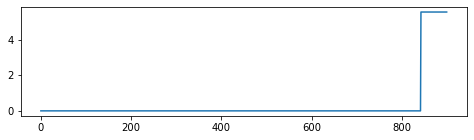

703
eps: 0.0
[ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


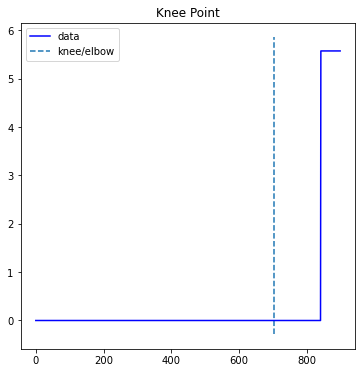

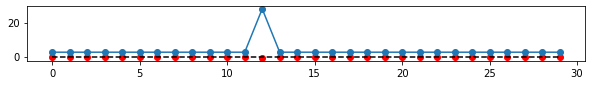

In [70]:
normed_data = standardize(data3)
eps = estimate_eps_pairdistance(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data3, pred)

size of pair distance: 1225


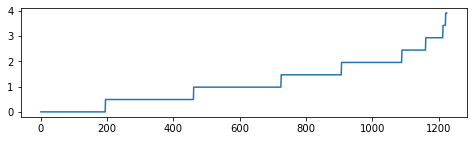

902
eps: 1.4708710135363803
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


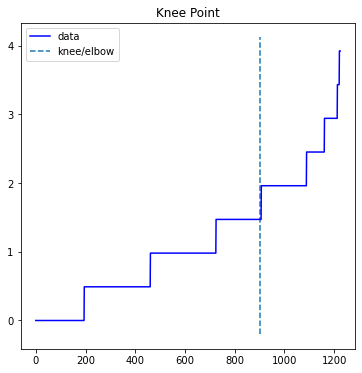

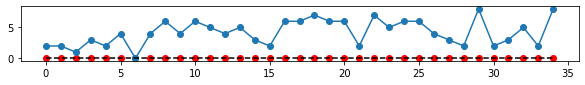

In [71]:
normed_data = standardize(data4)
eps = estimate_eps_pairdistance(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data4, pred)

size of pair distance: 361


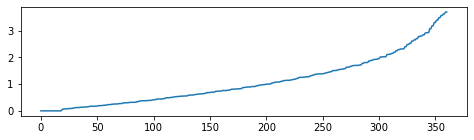

256
eps: 1.447461884554619
[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


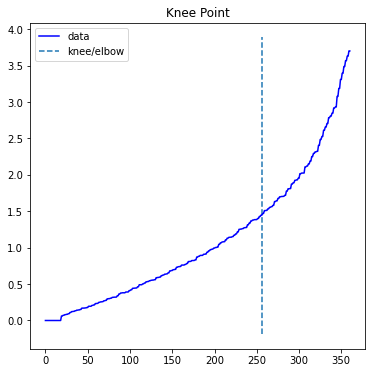

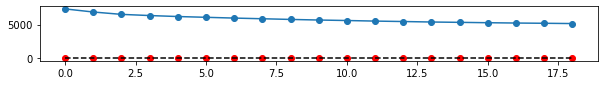

In [78]:
normed_data = standardize(data5)
eps = estimate_eps_pairdistance(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data5, pred)

size of pair distance: 20736


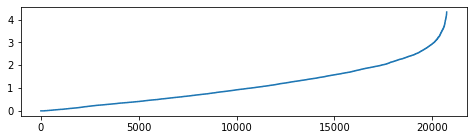

15052
eps: 1.589305924697992
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


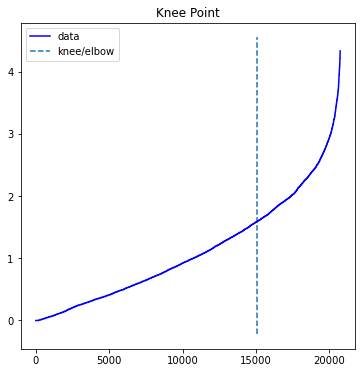

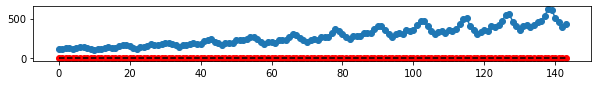

In [91]:
normed_data = standardize(data6)
eps = estimate_eps_pairdistance(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=10, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data6, pred)

# 2. Use Neighbors to Determine Eps

In [72]:
from sklearn.neighbors import NearestNeighbors

def estimate_eps_neighbor(data, metric="euclidean", min_samples=3):
    '''
    nearestneighbor method:
    http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/
    https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
    https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
    '''    
    neighbors = NearestNeighbors(n_neighbors=4)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    print("size of distance:", len(distances))
    kn = KneeLocator(range(len(distances)), distances, curve="convex", interp_method="polynomial", polynomial_degree=4, direction="increasing")
    kn.plot_knee()
    print(kn.elbow)
    return distances[kn.elbow-1]
    

size of distance: 30
24
eps: 0.11553425737574008
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


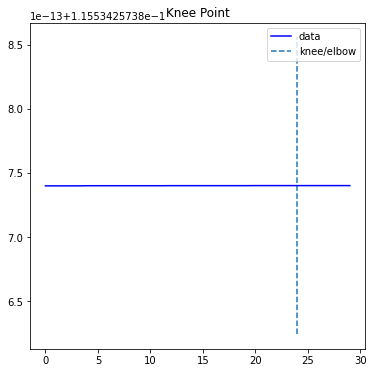

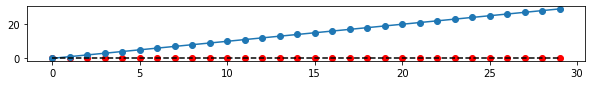

In [73]:
normed_data = standardize(data1)
eps = estimate_eps_neighbor(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=3, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data1, pred)

size of distance: 30
23
eps: 0.0
[ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


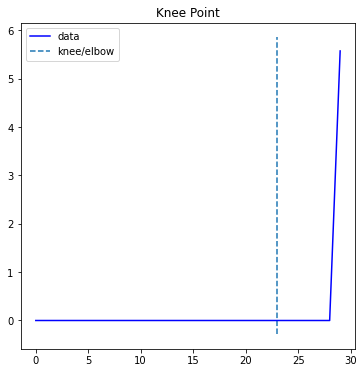

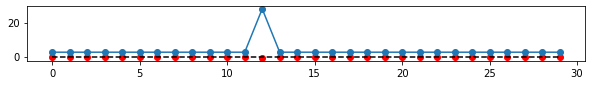

In [74]:
normed_data = standardize(data3)
eps = estimate_eps_neighbor(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=3, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data3, pred)

size of distance: 35
27
eps: 0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


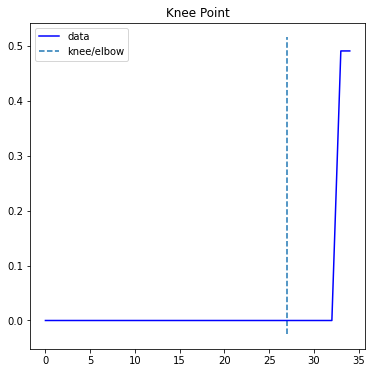

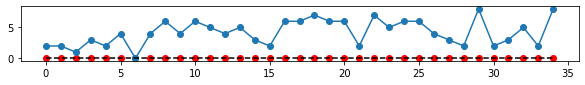

In [75]:
normed_data = standardize(data4)
eps = estimate_eps_neighbor(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=3, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data4, pred)

size of distance: 19
14
eps: 0.19532238400688465
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


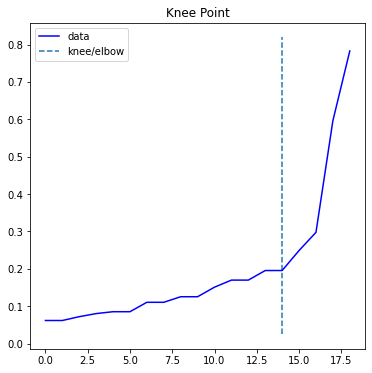

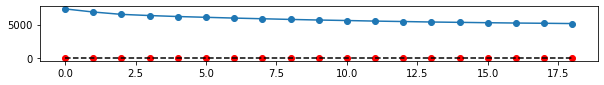

In [77]:
normed_data = standardize(data5)
eps = estimate_eps_neighbor(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=3, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data5, pred)

size of distance: 144
111
eps: 0.016729536049452487
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


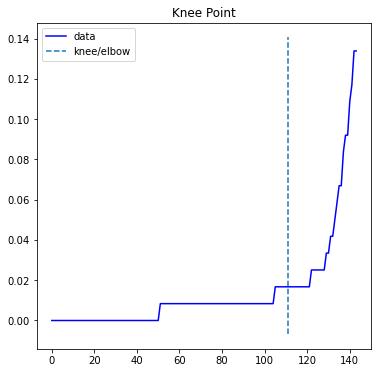

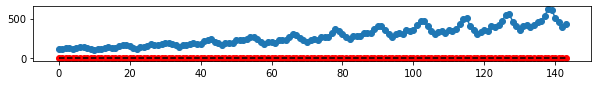

In [92]:
normed_data = standardize(data6)
eps = estimate_eps_neighbor(normed_data, metric="euclidean")
print ("eps:", eps)

model = DBSCAN(eps=1, min_samples=3, metric="euclidean")
model.fit(normed_data.reshape(-1, 1))
pred = model.labels_

visualize(data6, pred)